In [2]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Load datasets

In [7]:
## Movies data
movies = pd.read_csv(
    "./Datasets/movies.dat",
    sep="::",
    engine="python",
    names=["MovieID", "Title", "Genres"],
    encoding="latin1") 

# Top 5 rows
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
## Movies Ratings data
ratings = pd.read_csv(
    "./Datasets/ratings.dat",
    sep="::",
    engine="python",
    names=["UserID", "MovieID", "Rating", "Timestamp"],
    encoding="latin1")

# Top 5 rows
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [91]:
## User data
users = pd.read_csv(
    "./Datasets/users.dat",
    sep="::",
    engine="python",
    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"],
    encoding="latin1")

# Top 5 observations
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Data information

In [ ]:
# For movies data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
# For ratings data
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
# For users data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


#### Observation: 
* There are no missing values present in all data sets (movies, ratings and users).
* But ratings contains Timestamp that is integer. So, we have to convert it into pandas datetime object.

## Explore Movies data

In [15]:
# Top 10 observations
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [33]:
# Split the Title columns into Title and Year 
movies[["Title", "Year"]] = movies["Title"].str.replace(")", "").str.rsplit("(", n=1, expand=True)

movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


### Top 10 years when maximum movies realesed

In [40]:
top_10_years = movies.groupby("Year")["Title"].count().sort_values(ascending=False).head(10)
top_10_years

Year
1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: Title, dtype: int64

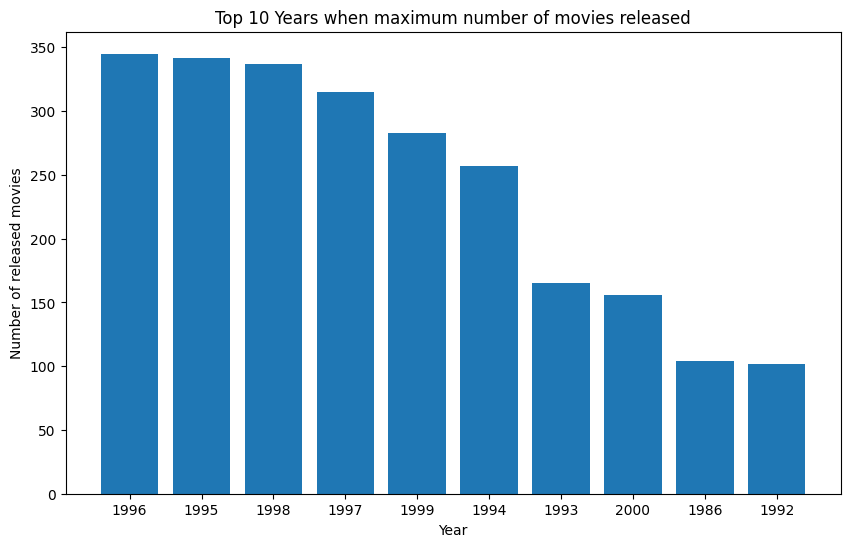

In [ ]:
# Bar graph
plt.figure(figsize=(10,6))
plt.bar(x=top_10_years.index, height=top_10_years.values)
plt.title("Top 10 Years when maximum number of movies released")
plt.xlabel("Year")
plt.ylabel("Number of released movies")
plt.show()

#### Observations:
It is clear that in year (1996, 1995, 1998, 1997, 1999, 1994, 1993, 2000, 1986, 1992) the maximum number of movies were released.

In [61]:
## Movies released in 1996
movies.loc[movies.Year=="1996", ["Year", "Title"]]["Title"].to_list()

['Eye for an Eye ',
 "Don't Be a Menace to South Central While Drinking Your Juice in the Hood ",
 'Two if by Sea ',
 'Bio-Dome ',
 'Lawnmower Man 2: Beyond Cyberspace ',
 'From Dusk Till Dawn ',
 'Bed of Roses ',
 'Big Bully ',
 'Juror, The ',
 'White Squall ',
 'Dunston Checks In ',
 'Black Sheep ',
 'Mary Reilly ',
 'Beautiful Girls ',
 'Broken Arrow ',
 'City Hall ',
 'Bottle Rocket ',
 'Mr. Wrong ',
 'Unforgettable ',
 'Happy Gilmore ',
 'Muppet Treasure Island ',
 'Before and After ',
 'If Lucy Fell ',
 'Race the Sun ',
 'Flirting With Disaster ',
 'Down Periscope ',
 'Up Close and Personal ',
 'Birdcage, The ',
 'New York Cop ',
 'Open Season ',
 'Executive Decision ',
 'Criminals ',
 'One Fine Day ',
 'Fargo ',
 'Homeward Bound II: Lost in San Francisco ',
 'Hellraiser: Bloodline ',
 'Pallbearer, The ',
 'Jane Eyre ',
 'Two Much ',
 'Ed ',
 'Thin Line Between Love and Hate, A ',
 'Primal Fear ',
 'Carried Away ',
 'All Dogs Go to Heaven 2 ',
 'Family Thing, A ',
 'Sgt. Bilko ',

### Top 10 Genres of movie released

In [62]:
top_10_genres = movies.groupby("Genres")["Title"].count().sort_values(ascending=False).head(10)
top_10_genres

Genres
Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: Title, dtype: int64

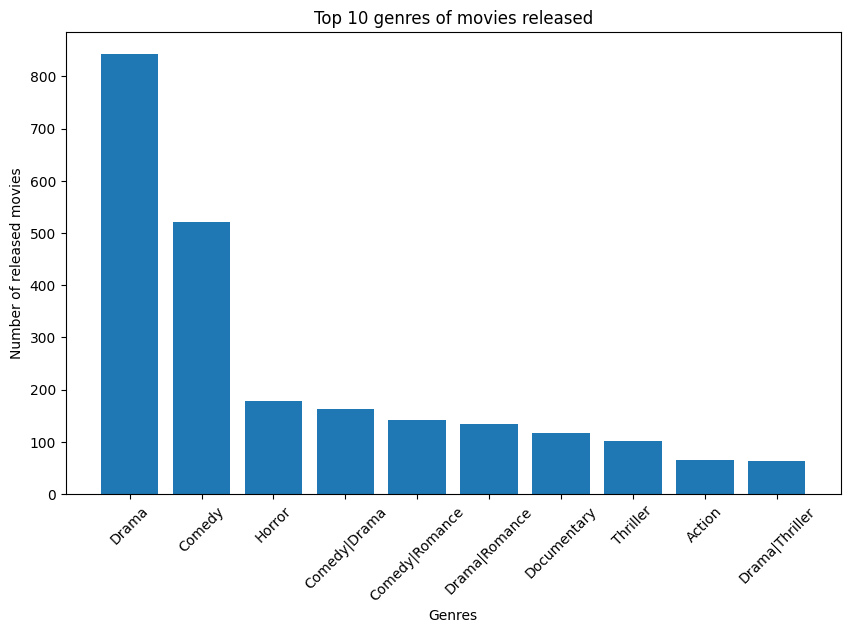

In [64]:
## Bar graph

plt.figure(figsize=(10,6))
plt.bar(x=top_10_genres.index, height=top_10_genres.values)
plt.title("Top 10 genres of movies released")
plt.xlabel("Genres")
plt.ylabel("Number of released movies")
plt.xticks(rotation=45) 
plt.show()

In [67]:
top_10_genres.index.to_list()

['Drama',
 'Comedy',
 'Horror',
 'Comedy|Drama',
 'Comedy|Romance',
 'Drama|Romance',
 'Documentary',
 'Thriller',
 'Action',
 'Drama|Thriller']

#### Observations:
* It is clear that the top 10 genres of movie released are 'Drama', 'Comedy', 'Horror',  'Comedy|Drama', 'Comedy|Romance', 'Drama|Romance', 'Documentary', 'Thriller', 'Action', 'Drama|Thriller' 

* The top genres is "comedy" on which the maximum number (843) of movies were released.

In [ ]:
## Name of the movies were released on "Drama"

movies.loc[movies.Genres=="Drama", ["Genres", "Title"]]["Title"].to_list()

['Nixon ',
 'Othello ',
 'Now and Then ',
 'Shanghai Triad (Yao a yao yao dao waipo qiao ',
 'Dangerous Minds ',
 'Dead Man Walking ',
 'Cry, the Beloved Country ',
 'Restoration ',
 'Lamerica ',
 'Georgia ',
 'Home for the Holidays ',
 "Mr. Holland's Opus ",
 'Two Bits ',
 'Crossing Guard, The ',
 'White Balloon, The (Badkonake Sefid  ',
 "Antonia's Line (Antonia ",
 'Once Upon a Time... When We Were Colored ',
 'Journey of August King, The ',
 'Beautiful Girls ',
 'Hate (Haine, La ',
 "Margaret's Museum ",
 'Race the Sun ',
 'Boys of St. Vincent, The ',
 "Star Maker, The (Uomo delle stelle, L' ",
 'Silence of the Palace, The (Saimt el Qusur ',
 'Angela ',
 'Neon Bible, The ',
 'Shadows (Cienie ',
 'Gospa ',
 'Basketball Diaries, The ',
 'Awfully Big Adventure, An ',
 'Apollo 13 ',
 'Belle de jour ',
 'Clockers ',
 'Feast of July ',
 'Kids ',
 'Nadja ',
 'Scarlet Letter, The ',
 'Showgirls ',
 'Smoke ',
 'Stars Fell on Henrietta, The ',
 'Three Wishes ',
 "White Man's Burden ",
 'Brow

## Explore ratings data

### Convert timestamps
Timestamps are numerical representations of specific moments in time. In MovieLens dataset the timestamp is typically a **Unix** timestamp.

As an example, the number (e.g., 978300760) indicates how many seconds have elapsed since January 1, 1970, 00:00:00 UTC (this starting point is known as the Unix epoch).

In [13]:
# Convert timestamp to datetime
ratings["Datetime"] = pd.to_datetime(ratings["Timestamp"], unit='s')
ratings.head()

,UserID,MovieID,Rating,Timestamp,Datetime
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [14]:
# Drop the Timestamp column
ratings.drop(columns=["Timestamp"], inplace=True)
ratings.head()

,UserID,MovieID,Rating,Datetime
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


## Explore users data

In [92]:
## Top 10 observations

users.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


#### Observation:
We are seeing that Age and Occupation has only number but do not contain any specific value. It is not understandable.

So, we will update this values with their corresponding values.

### Update Occupation

In [93]:
## Occupation dictionary
occupation_dict = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}


In [94]:
users["Occupation"] = users["Occupation"].map(occupation_dict)
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


### Update Age

In [95]:
## Age dictionary

age_dict = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}


In [96]:
## Update Age columns

users["Age"] = users["Age"].map(age_dict)
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


## Marge Data Frames

In [97]:
data = pd.merge(movies, ratings, on="MovieID").merge(users, on="UserID")
data.head()

,MovieID,Title,Genres,Year,UserID,Rating,Datetime,Gender,Age,Occupation,Zip-code
0,1,Toy Story,Animation|Children's|Comedy,1995,1,5,2001-01-06 23:37:48,F,Under 18,K-12 student,48067
1,1,Toy Story,Animation|Children's|Comedy,1995,6,4,2000-12-31 04:30:08,F,50-55,homemaker,55117
2,1,Toy Story,Animation|Children's|Comedy,1995,8,4,2000-12-31 03:31:36,M,25-34,programmer,11413
3,1,Toy Story,Animation|Children's|Comedy,1995,9,5,2000-12-31 01:25:52,M,25-34,technician/engineer,61614
4,1,Toy Story,Animation|Children's|Comedy,1995,10,5,2000-12-31 01:34:34,F,35-44,academic/educator,95370


### Drop unnecessary columns
MovieID and UserID do not contribute much information. So, we can drop those columns.

In [99]:
data.drop(columns=["MovieID", "UserID"], inplace=True)
data.head()

,Title,Genres,Year,Rating,Datetime,Gender,Age,Occupation,Zip-code
0,Toy Story,Animation|Children's|Comedy,1995,5,2001-01-06 23:37:48,F,Under 18,K-12 student,48067
1,Toy Story,Animation|Children's|Comedy,1995,4,2000-12-31 04:30:08,F,50-55,homemaker,55117
2,Toy Story,Animation|Children's|Comedy,1995,4,2000-12-31 03:31:36,M,25-34,programmer,11413
3,Toy Story,Animation|Children's|Comedy,1995,5,2000-12-31 01:25:52,M,25-34,technician/engineer,61614
4,Toy Story,Animation|Children's|Comedy,1995,5,2000-12-31 01:34:34,F,35-44,academic/educator,95370


### Top 10 top rated movies

In [103]:
top_10_rated_movies = data.groupby("Title")["Rating"].mean().sort_values(ascending=False).head(10)

top_10_rated_movies

Title
Ulysses (Ulisse                       5.0
Baby, The                             5.0
Follow the Bitch                      5.0
Bittersweet Motel                     5.0
One Little Indian                     5.0
Gate of Heavenly Peace, The           5.0
Smashing Time                         5.0
Song of Freedom                       5.0
Lured                                 5.0
Schlafes Bruder (Brother of Sleep     5.0
Name: Rating, dtype: float64

#### Top 10 top rated movies by gender

In [106]:
mean_ratings_by_gender = data.pivot_table("Rating", index="Title", columns="Gender", aggfunc="mean").head(10)

mean_ratings_by_gender

Gender,F,M
Title,,
"$1,000,000 Duck",3.375000,2.761905
'Night Mother,3.388889,3.352941
'Til There Was You,2.675676,2.733333
"'burbs, The",2.793478,2.962085
...And Justice for All,3.828571,3.689024
1-900,2.000000,3.000000
10 Things I Hate About You,3.646552,3.311966
101 Dalmatians,3.545994,3.287162
12 Angry Men,4.184397,4.328421


In [142]:
## Top 10 movies rated by male

top_10_rated_movies_by_male = mean_ratings_by_gender.sort_values(ascending=False, by="M")["M"]

top_10_rated_movies_by_male

Title
12 Angry Men                   4.328421
...And Justice for All         3.689024
'Night Mother                  3.352941
10 Things I Hate About You     3.311966
101 Dalmatians                 3.287162
13th Warrior, The              3.168000
1-900                          3.000000
'burbs, The                    2.962085
$1,000,000 Duck                2.761905
'Til There Was You             2.733333
Name: M, dtype: float64

In [143]:
## Top 10 movies rated by female

top_10_rated_movies_by_female = mean_ratings_by_gender.sort_values(ascending=False, by="F")["F"]

top_10_rated_movies_by_female

Title
12 Angry Men                   4.184397
...And Justice for All         3.828571
10 Things I Hate About You     3.646552
101 Dalmatians                 3.545994
'Night Mother                  3.388889
$1,000,000 Duck                3.375000
13th Warrior, The              3.112000
'burbs, The                    2.793478
'Til There Was You             2.675676
1-900                          2.000000
Name: F, dtype: float64

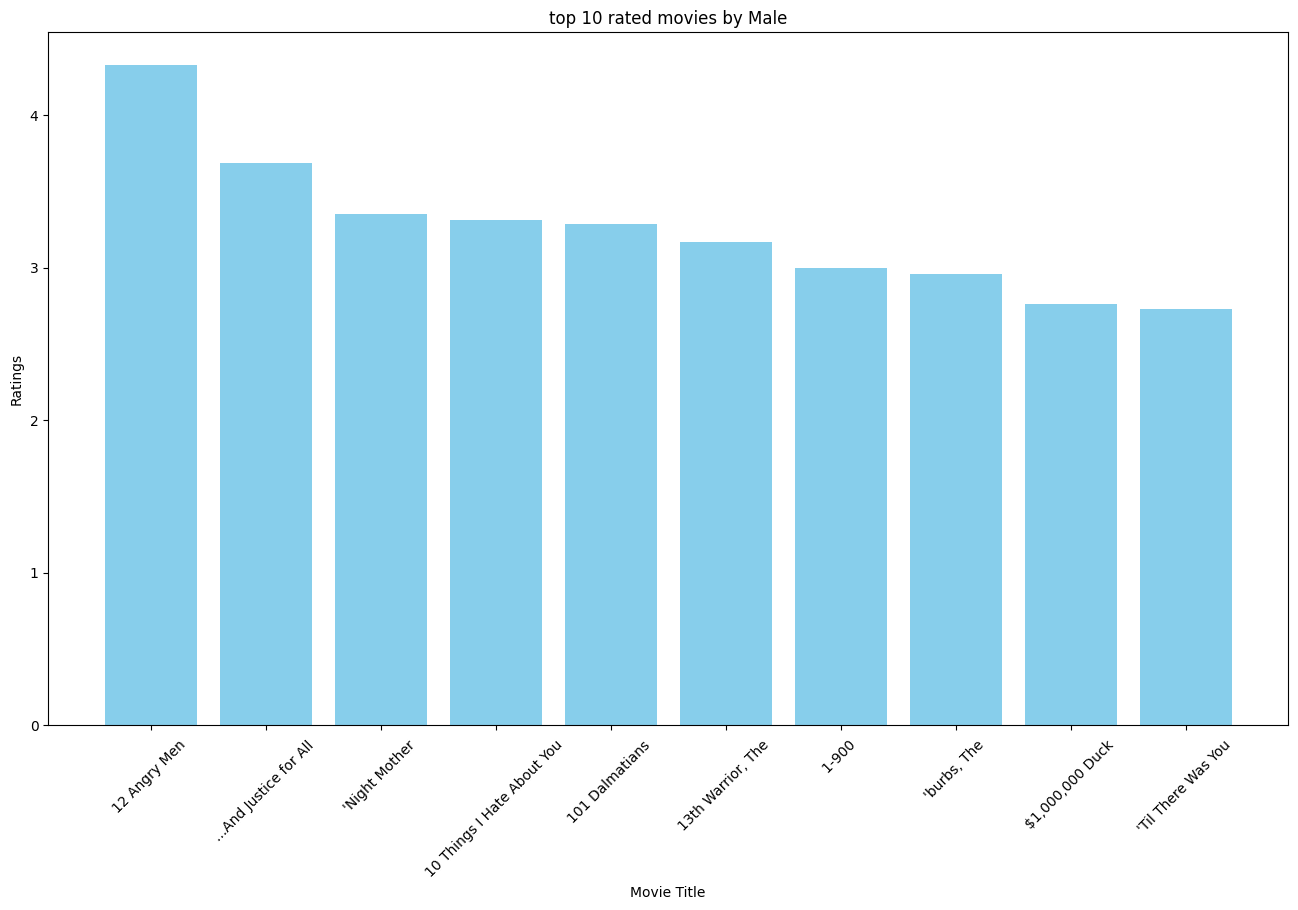

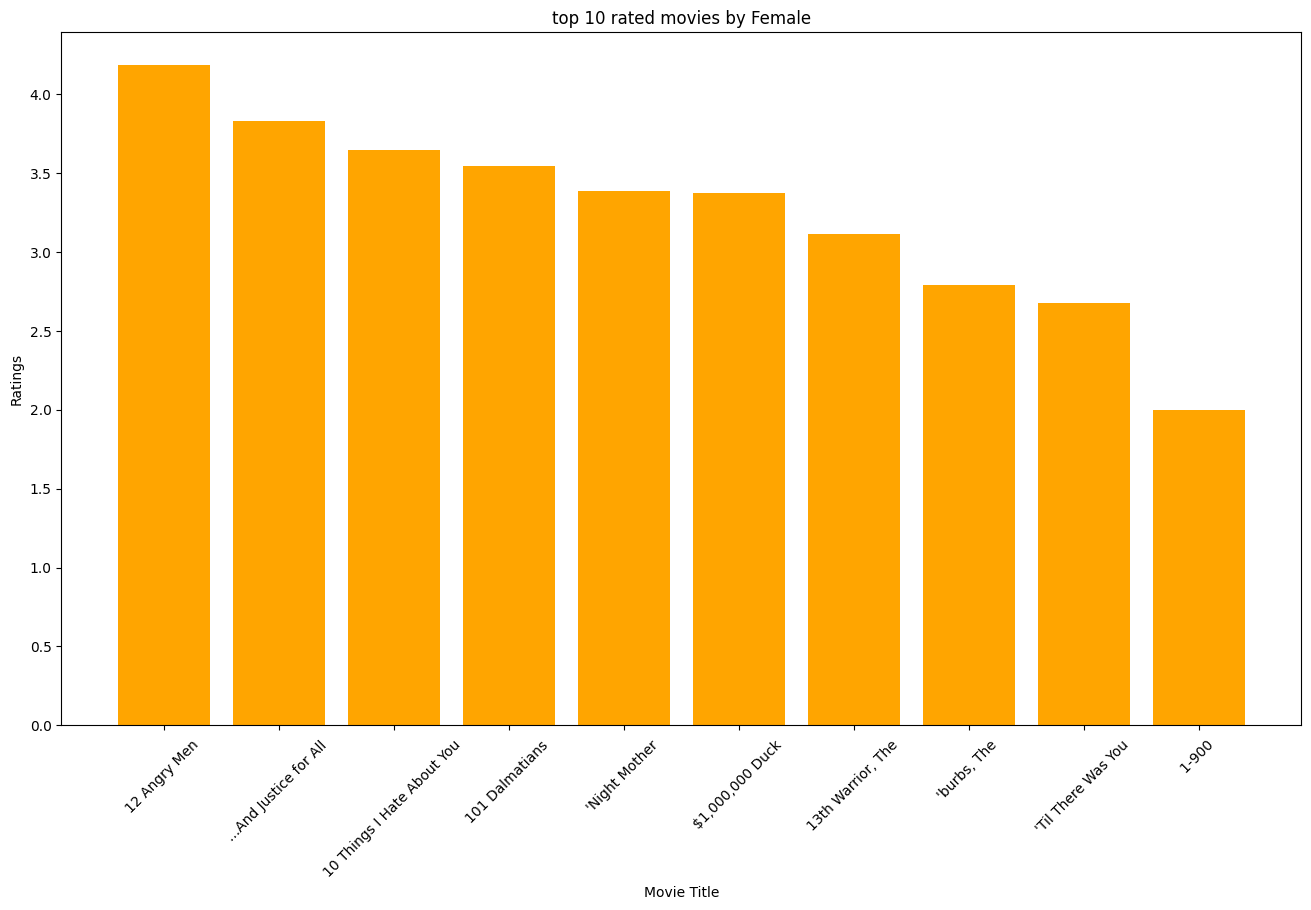

In [145]:
## Top 10 rated movies by Male VS Female 

top_10_rated_movies_dict = {
    "Male": [top_10_rated_movies_by_male, "skyblue"], 
    "Female": [top_10_rated_movies_by_female, "orange"]
    }

for key, value in top_10_rated_movies_dict.items():
    plt.figure(figsize=(16,9))
    plt.bar(x=value[0].index, height=value[0].values, color=value[1])
    plt.title(f"top 10 rated movies by {key}")
    plt.xlabel("Movie Title")
    plt.ylabel("Ratings")
    plt.xticks(rotation=45)
    plt.show()
    


### Genres rated most
* Explore which type of movies rated most.
* Explore which gender has seen which type of movies.

In [153]:
genres_rated_most = data.groupby("Genres")["Rating"].count().sort_values(ascending=False)
genres_rated_most

Genres
Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Rating, Length: 301, dtype: int64

**Observations:** 
* Comedy movies has the maximum number of ratings that means users love to watch comedy movie the most, and then dramatic movies. 
* We also see that Fantasy movies has the lowest number of ratings.

#### Genres based on gender
Explore which gender has seen which type of movies.

In [154]:
genres_based_on_gender = data.pivot_table("Rating", index="Genres", columns="Gender", aggfunc="count")
genres_based_on_gender

Gender,F,M
Genres,,
Action,1611.0,10700.0
Action|Adventure,1978.0,8468.0
Action|Adventure|Animation,64.0,281.0
Action|Adventure|Animation|Children's|Fantasy,41.0,94.0
Action|Adventure|Animation|Horror|Sci-Fi,71.0,547.0
...,...,...
Sci-Fi|Thriller|War,40.0,240.0
Sci-Fi|War,231.0,1136.0
Thriller,4312.0,13539.0


In [155]:
## Genres by male

genres_by_male = genres_based_on_gender["M"].sort_values(ascending=False)
genres_by_male

Genres
Comedy                       87675.0
Drama                        78571.0
Comedy|Drama                 29937.0
Comedy|Romance               27112.0
Action|Thriller              21929.0
                              ...   
Children's|Fantasy              16.0
Adventure|Musical|Romance       12.0
Comedy|Film-Noir|Thriller        4.0
Film-Noir|Horror                 1.0
Fantasy                          1.0
Name: M, Length: 301, dtype: float64

**Observation:** 
* Males has rated comedy movie most and then drama movies. So, we can say Males love to watch comedy movie.
* Similarly they don't like to watch fantasy, horror and thriller types of movies.


In [156]:
## Genres by female

genres_by_female = genres_based_on_gender["F"].sort_values(ascending=False)
genres_by_female

Genres
Drama                          32852.0
Comedy                         29208.0
Comedy|Romance                 15600.0
Comedy|Drama                   12308.0
Drama|Romance                  11749.0
                                ...   
Animation|Mystery                  5.0
Action|Adventure|Children's        4.0
Comedy|Film-Noir|Thriller          1.0
Film-Noir|Horror                   1.0
Fantasy                            NaN
Name: F, Length: 301, dtype: float64

**Observation:** 
* Females has rated drama movie most and then comedy movies. So, we can say Males love to watch drama movie.
* Similarly they don't like to watch fantasy, horror and thriller types of movies.

### Top rated movies based on Age Group

In [157]:
data.head()

,Title,Genres,Year,Rating,Datetime,Gender,Age,Occupation,Zip-code
0,Toy Story,Animation|Children's|Comedy,1995,5,2001-01-06 23:37:48,F,Under 18,K-12 student,48067
1,Toy Story,Animation|Children's|Comedy,1995,4,2000-12-31 04:30:08,F,50-55,homemaker,55117
2,Toy Story,Animation|Children's|Comedy,1995,4,2000-12-31 03:31:36,M,25-34,programmer,11413
3,Toy Story,Animation|Children's|Comedy,1995,5,2000-12-31 01:25:52,M,25-34,technician/engineer,61614
4,Toy Story,Animation|Children's|Comedy,1995,5,2000-12-31 01:34:34,F,35-44,academic/educator,95370
